In [1]:
import pandas as pd
import numpy as np

# df = pd.read_csv('datasets/PS1.csv', header=None)
# PS1_average = df.mean(axis=1).round(2)
# PS1_average.to_csv("datasets/PS1_average.csv", index=False)

# df = pd.read_csv('datasets/TS1.csv', header=None)
# TS1_average = df.mean(axis=1).round(2)
# TS1_average.to_csv("datasets/TS1_average.csv", index=False)

# df = pd.read_csv('datasets/VS1.csv', header=None)
# VS1_average = df.mean(axis=1).round(2)
# VS1_average.to_csv("datasets/VS1_average.csv", index=False)

# df = pd.read_csv('datasets/FS1.csv', header=None)
# FS1_average = df.mean(axis=1).round(2)
# FS1_average.to_csv("datasets/FS1_average.csv", index=False)

# df = pd.read_csv('datasets/EPS1.csv', header=None)
# EPS1_average = df.mean(axis=1).round(2)
# EPS1_average.to_csv("datasets/EPS1_average.csv", index=False)

In [2]:
files = ['datasets/PS1_average.csv', 'datasets/TS1_average.csv', 'datasets/VS1_average.csv','datasets/FS1_average.csv', 'datasets/EPS1_average.csv']
# profile_file = 'datasets/profile.csv'
# data_dfs = [pd.read_csv(file) for file in files]
# combined_df = pd.concat(data_dfs, axis=1)

# profile_df = pd.read_csv(profile_file)
# cooler_condition = profile_df[['cooler_condition']]
# valve_condition = profile_df[['valve_condition']]
# internal_pump_leakage = profile_df[['internal_pump_leakage']]
# hydraulic_accumulator = profile_df[['hydraulic_accumulator']]
# stable_flag = profile_df[['stable_flag']]


# cooler_df = pd.concat([combined_df, cooler_condition], axis=1)
# cooler_df.to_csv('datasets/cooler_condition.csv', index=False)

# valve_df = pd.concat([combined_df, valve_condition], axis=1)
# valve_df.to_csv('datasets/valve_condition.csv', index=False)

# pump_df = pd.concat([combined_df, internal_pump_leakage], axis=1)
# pump_df.to_csv('datasets/internal_pump_leakage.csv', index=False)

# stable_df = pd.concat([combined_df, stable_flag], axis=1)
# stable_df.to_csv('datasets/stable_flag', index=False)

# hydraulic_acc_df = pd.concat([combined_df, hydraulic_accumulator], axis=1)
# hydraulic_acc_df.to_csv('datasets/hydraulic_accumulator.csv', index=False)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler

data = pd.read_csv('datasets/cooler_condition.csv')

X = data[['pressure','temperature','vibration','volume_flow','Motor_power']] 

y = data['cooler_condition']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
model = XGBClassifier( eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

y_pred_labels = label_encoder.inverse_transform(y_pred)
y_pred_labels

array([100,  20, 100,   3, 100, 100,  20,   3, 100, 100, 100,   3, 100,
       100,  20,   3,  20,   3,   3,  20,  20,   3, 100, 100,   3,   3,
        20, 100,   3,   3,   3,   3,   3,  20, 100, 100,  20,   3, 100,
         3, 100, 100, 100,   3, 100,  20, 100, 100, 100,   3, 100,  20,
        20, 100,  20, 100, 100, 100, 100, 100,  20,  20,  20,   3,   3,
         3,   3,   3,  20, 100,  20,   3,   3, 100,   3,  20, 100,   3,
         3,  20,   3,  20,  20,   3,   3,   3, 100,   3, 100,   3, 100,
        20, 100, 100,   3, 100,   3,  20,  20, 100,  20,   3,   3,   3,
         3,   3, 100, 100, 100, 100,   3, 100, 100,   3,   3,  20, 100,
       100,   3, 100, 100,   3, 100,  20,  20,   3,   3,  20, 100,   3,
       100,  20, 100, 100,   3,  20,  20,  20,  20,   3,  20,   3, 100,
        20,  20,  20,   3, 100, 100,   3,   3,   3,  20, 100, 100,  20,
       100,  20, 100,   3,  20, 100,  20, 100,  20,   3,  20,   3, 100,
         3, 100,   3, 100, 100,   3,  20, 100,   3,  20, 100,   

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9931972789115646
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       152
           1       0.98      1.00      0.99       135
           2       1.00      0.99      0.99       154

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



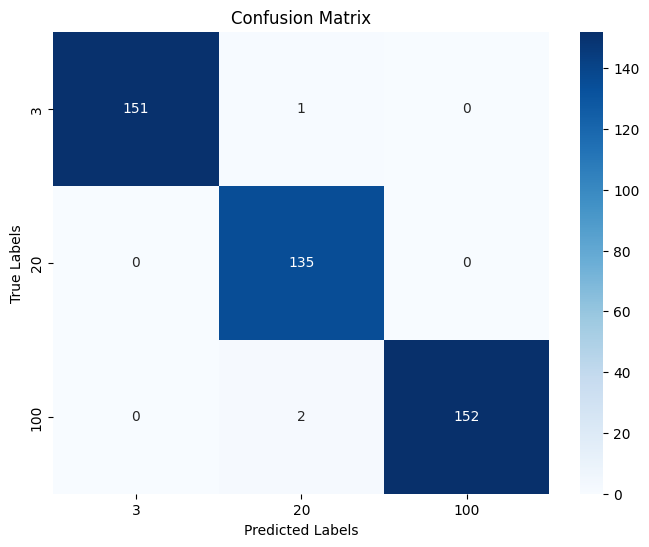

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [16]:
import joblib

joblib.dump(model, 'cooler_condition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']